In [1363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [1364]:
data_file = "conso.txt"

In [1365]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

def save_text(filename):
    f = open(filename, "w")
    f.write(text)
    f.close()


#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [1366]:
text='test'
filename='text.txt'
#save_text(filename)

In [1367]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [1368]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


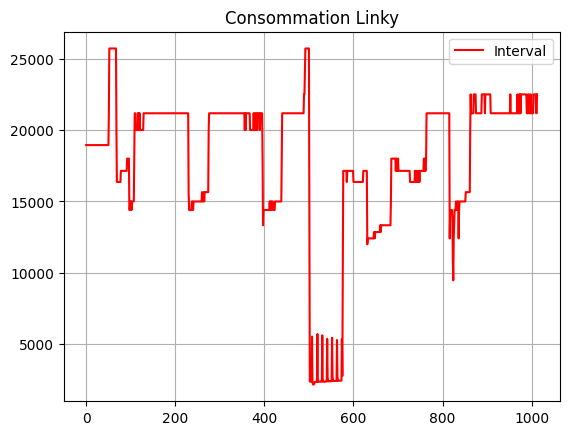

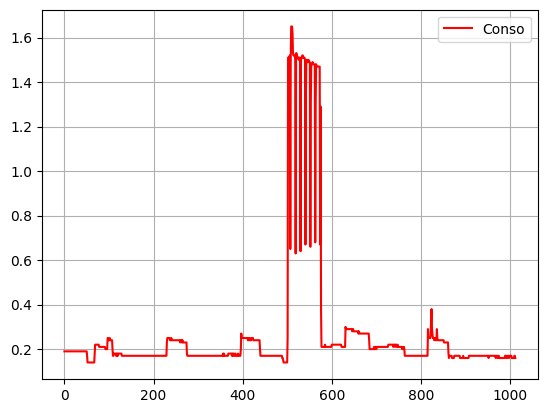

In [1369]:

plt.title('Consommation Linky')
plt.plot(data['interval'], color='red',label='Interval')
plt.grid()
plt.legend()
plt.show()
plt.plot(data['Conso'], color='red',label='Conso')
plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [1370]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [1371]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163307 entries, 0 to 163306
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  163307 non-null  int64  
 1   kWh       163307 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.5 MB


In [1372]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
163302,28394,0.13
163303,28502,0.13
163304,27748,0.13
163305,28453,0.13


<Axes: >

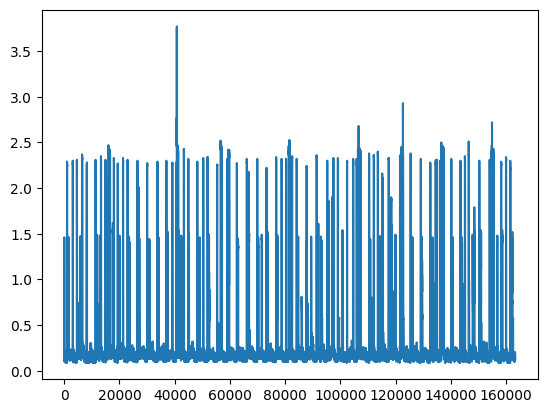

In [1373]:
conso_data['kWh'].plot()

In [1374]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
163302,28394,0.13,28.394,126.787349,3865506580
163303,28502,0.13,28.502,126.306926,3865535082
163304,27748,0.13,27.748,129.739080,3865562830
163305,28453,0.13,28.453,126.524444,3865591283


In [1375]:
# index dernier echantillon
l=len(conso_data)-1
l

163306

In [1376]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

3865619629000

In [1377]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 1, 46, 53, 475381)

In [1378]:
old

False

In [1379]:
if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)

conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163307 entries, 0 to 163306
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Interval   163307 non-null  int64         
 1   kWh        163307 non-null  float64       
 2   sec        163307 non-null  float64       
 3   Wh         163307 non-null  float64       
 4   cumul(ms)  163307 non-null  int64         
 5   dates      163307 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 7.5 MB


In [1380]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:47:19.764381,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:47:46.007381,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:48:11.892381,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:48:37.646381,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:49:03.420381,07/03/2024
...,...,...,...,...,...,...,...
163302,28394,0.13,28.394,126.787349,3865506580,2024-04-20 19:32:00.055381,20/04/2024
163303,28502,0.13,28.502,126.306926,3865535082,2024-04-20 19:32:28.557381,20/04/2024
163304,27748,0.13,27.748,129.739080,3865562830,2024-04-20 19:32:56.305381,20/04/2024
163305,28453,0.13,28.453,126.524444,3865591283,2024-04-20 19:33:24.758381,20/04/2024


In [1381]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 01:47:19.764381   
 
          days  
 0  07/03/2024  ,
         Interval   kWh     sec          Wh   cumul(ms)  \
 163306     28346  0.13  28.346  127.002046  3865619629   
 
                             dates        days  
 163306 2024-04-20 19:33:53.104381  20/04/2024  )

In [1382]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year

('20/04/2024', 4, 2024)

In [1383]:
conso_data[conso_data['days']==day]

,Interval,kWh,sec,Wh,cumul(ms),dates,days
160583,29414,0.12,29.414,122.390698,3795204439,2024-04-20 00:00:17.914381,20/04/2024
160584,26851,0.13,26.851,134.073219,3795231290,2024-04-20 00:00:44.765381,20/04/2024
160585,27702,0.13,27.702,129.954516,3795258992,2024-04-20 00:01:12.467381,20/04/2024
160586,28276,0.13,28.276,127.316452,3795287268,2024-04-20 00:01:40.743381,20/04/2024
160587,28695,0.12,28.695,125.457397,3795315963,2024-04-20 00:02:09.438381,20/04/2024
...,...,...,...,...,...,...,...
163302,28394,0.13,28.394,126.787349,3865506580,2024-04-20 19:32:00.055381,20/04/2024
163303,28502,0.13,28.502,126.306926,3865535082,2024-04-20 19:32:28.557381,20/04/2024
163304,27748,0.13,27.748,129.739080,3865562830,2024-04-20 19:32:56.305381,20/04/2024
163305,28453,0.13,28.453,126.524444,3865591283,2024-04-20 19:33:24.758381,20/04/2024


In [1384]:
day

'20/04/2024'

In [1385]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:47:19.764381,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:47:46.007381,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:48:11.892381,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:48:37.646381,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:49:03.420381,07/03/2024
...,...,...,...,...,...,...,...
163302,28394,0.13,28.394,126.787349,3865506580,2024-04-20 19:32:00.055381,20/04/2024
163303,28502,0.13,28.502,126.306926,3865535082,2024-04-20 19:32:28.557381,20/04/2024
163304,27748,0.13,27.748,129.739080,3865562830,2024-04-20 19:32:56.305381,20/04/2024
163305,28453,0.13,28.453,126.524444,3865591283,2024-04-20 19:33:24.758381,20/04/2024


In [1386]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
grouped


In [1387]:
# count elements in each group => conso in watts => convert to kW
(grouped.count()/1000)

,kWh
days,
07/03/2024,3.143
08/03/2024,3.751
09/03/2024,3.082
10/03/2024,3.534
11/03/2024,4.545
12/03/2024,3.552
13/03/2024,3.539
14/03/2024,3.656
15/03/2024,3.563


In [1388]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean


kWh    0.318634
dtype: float64

In [1389]:
# mean by day from 07/03
mean=(grouped.count()/1000).mean()
mean

kWh    3.629044
dtype: float64

In [1390]:
filename='conso_par_jour.csv'
df_grp = grouped.count()/1000
df_grp.to_csv(filename)
filename='../conso_par_jour.csv'
df_grp.to_csv(filename)

In [1391]:
df_grp

,kWh
days,
07/03/2024,3.143
08/03/2024,3.751
09/03/2024,3.082
10/03/2024,3.534
11/03/2024,4.545
12/03/2024,3.552
13/03/2024,3.539
14/03/2024,3.656
15/03/2024,3.563


In [1392]:
#manuel
#day = '11/03/2024'


In [1393]:
# conso day
conso_day = conso_data[conso_data['days']==day]
len(conso_day)

2724

In [1394]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
160583,29414,0.12,29.414,122.390698,3795204439,2024-04-20 00:00:17.914381,20/04/2024
160584,26851,0.13,26.851,134.073219,3795231290,2024-04-20 00:00:44.765381,20/04/2024
160585,27702,0.13,27.702,129.954516,3795258992,2024-04-20 00:01:12.467381,20/04/2024
160586,28276,0.13,28.276,127.316452,3795287268,2024-04-20 00:01:40.743381,20/04/2024
160587,28695,0.12,28.695,125.457397,3795315963,2024-04-20 00:02:09.438381,20/04/2024
...,...,...,...,...,...,...,...
163302,28394,0.13,28.394,126.787349,3865506580,2024-04-20 19:32:00.055381,20/04/2024
163303,28502,0.13,28.502,126.306926,3865535082,2024-04-20 19:32:28.557381,20/04/2024
163304,27748,0.13,27.748,129.739080,3865562830,2024-04-20 19:32:56.305381,20/04/2024
163305,28453,0.13,28.453,126.524444,3865591283,2024-04-20 19:33:24.758381,20/04/2024


In [1395]:
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [1396]:
conso_day.head(1).dates, conso_day.tail(1).dates


(160583   2024-04-20 00:00:17.914381
 Name: dates, dtype: datetime64[ns],
 163306   2024-04-20 19:33:53.104381
 Name: dates, dtype: datetime64[ns])

In [1397]:
conso_day.loc[:,'dates']

160583   2024-04-20 00:00:17.914381
160584   2024-04-20 00:00:44.765381
160585   2024-04-20 00:01:12.467381
160586   2024-04-20 00:01:40.743381
160587   2024-04-20 00:02:09.438381
                    ...            
163302   2024-04-20 19:32:00.055381
163303   2024-04-20 19:32:28.557381
163304   2024-04-20 19:32:56.305381
163305   2024-04-20 19:33:24.758381
163306   2024-04-20 19:33:53.104381
Name: dates, Length: 2724, dtype: datetime64[ns]

In [1398]:
conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_26500\2932063292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:17,29414,0.12,29.414,122.390698,3795204439,2024-04-20 00:00:17.914381,20/04/2024
0:0:44,26851,0.13,26.851,134.073219,3795231290,2024-04-20 00:00:44.765381,20/04/2024
0:1:12,27702,0.13,27.702,129.954516,3795258992,2024-04-20 00:01:12.467381,20/04/2024
0:1:40,28276,0.13,28.276,127.316452,3795287268,2024-04-20 00:01:40.743381,20/04/2024
0:2:9,28695,0.12,28.695,125.457397,3795315963,2024-04-20 00:02:09.438381,20/04/2024
...,...,...,...,...,...,...,...
19:32:0,28394,0.13,28.394,126.787349,3865506580,2024-04-20 19:32:00.055381,20/04/2024
19:32:28,28502,0.13,28.502,126.306926,3865535082,2024-04-20 19:32:28.557381,20/04/2024
19:32:56,27748,0.13,27.748,129.739080,3865562830,2024-04-20 19:32:56.305381,20/04/2024


In [1399]:
here = now.strftime('%H:%M:%S')
here, len(df)/1000

('19:33:56', 2.724)

In [1400]:
conso_jour=len(df['kWh'])

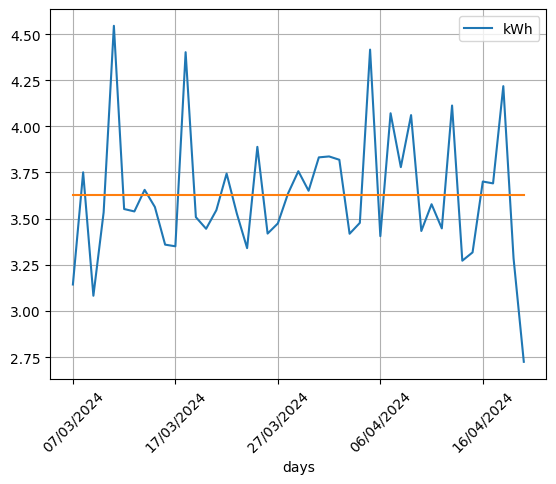

In [1401]:
df_grp.plot()#kind='bar')
plt.plot((0,len(df_grp)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


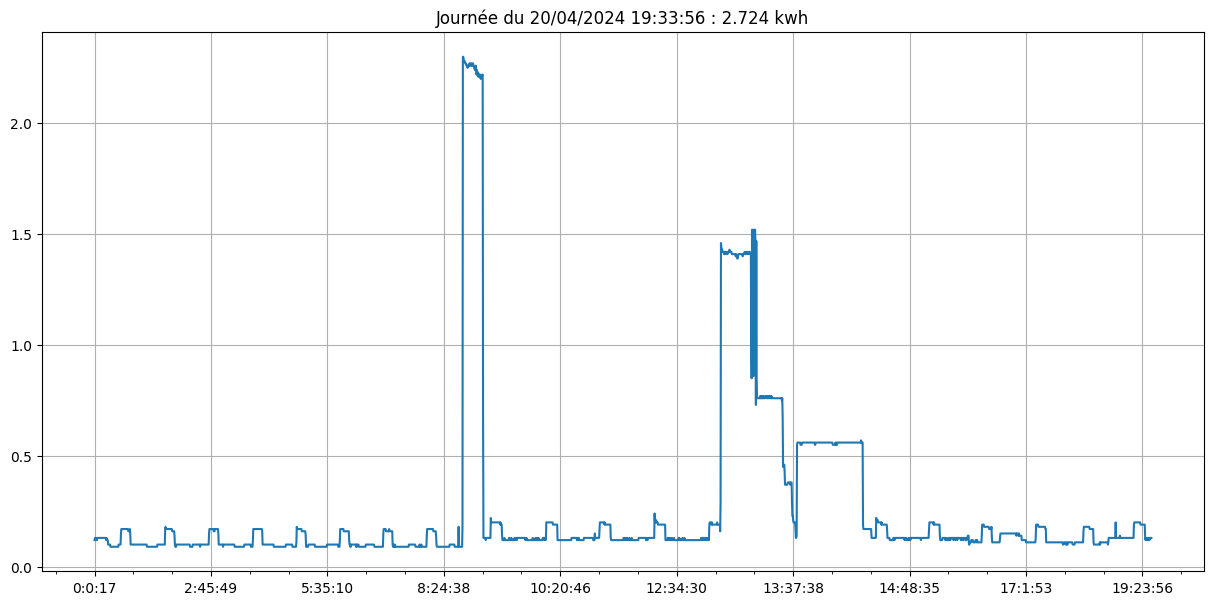

In [1402]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()

In [1403]:
df['power']=[y for x,y in zip(df['Interval'],df['kWh'])]

In [1404]:
df['power']

heure
0:0:17      0.12
0:0:44      0.13
0:1:12      0.13
0:1:40      0.13
0:2:9       0.12
            ... 
19:32:0     0.13
19:32:28    0.13
19:32:56    0.13
19:33:24    0.13
19:33:53    0.13
Name: power, Length: 2724, dtype: float64

<Axes: xlabel='heure'>

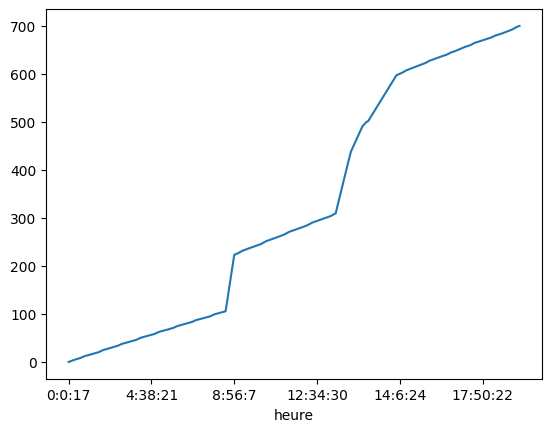

In [1405]:
evo=df['power'].cumsum()
evo.plot()

383

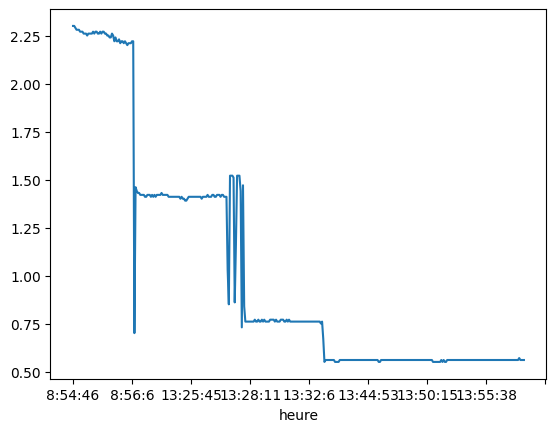

In [1406]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

1596

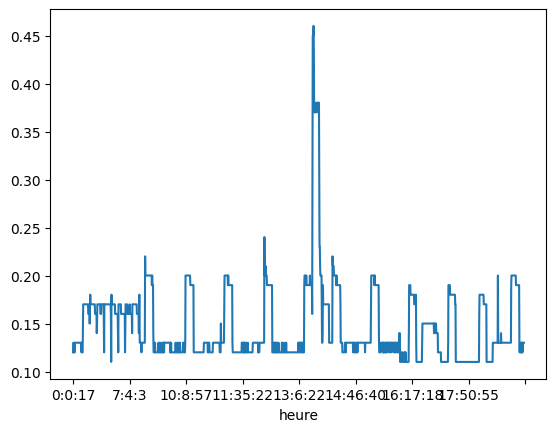

In [1407]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

2341

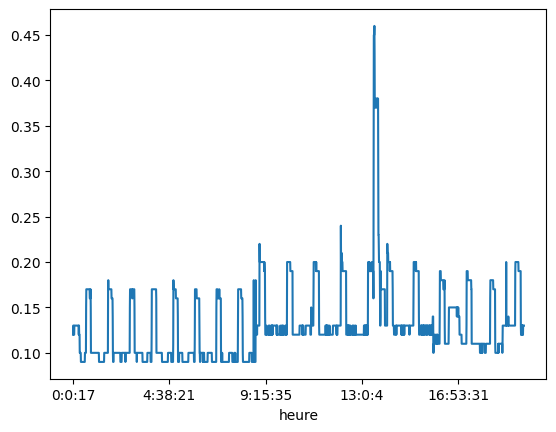

In [1408]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [1409]:
time = conso_data['dates']
time


0        2024-03-07 01:47:19.764381
1        2024-03-07 01:47:46.007381
2        2024-03-07 01:48:11.892381
3        2024-03-07 01:48:37.646381
4        2024-03-07 01:49:03.420381
                    ...            
163302   2024-04-20 19:32:00.055381
163303   2024-04-20 19:32:28.557381
163304   2024-04-20 19:32:56.305381
163305   2024-04-20 19:33:24.758381
163306   2024-04-20 19:33:53.104381
Name: dates, Length: 163307, dtype: datetime64[ns]

In [1410]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [1411]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [1412]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

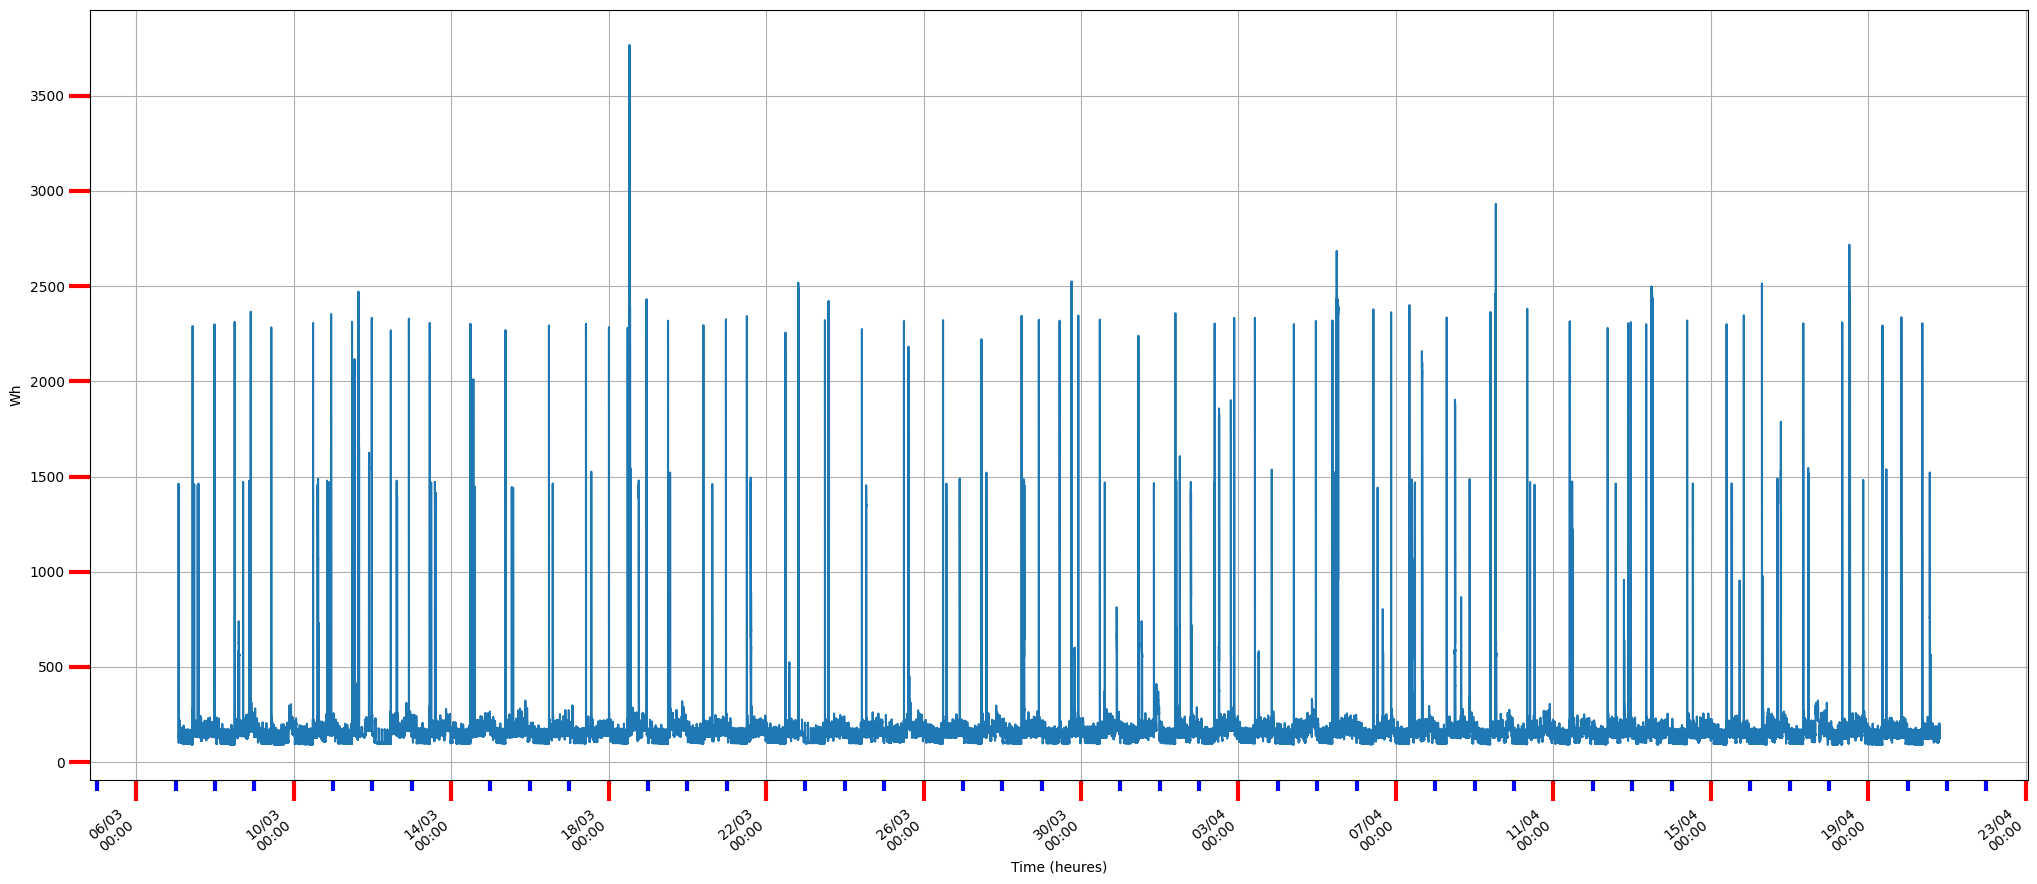

In [1413]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [1414]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
163306,28346,0.13,28.346,127.002046,3865619629,2024-04-20 19:33:53.104381,20/04/2024


In [1415]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

3865619629000

# Slice of last 1 kWh

In [1416]:
l = len(conso_data)  # total watt consommés
l

163307

In [1417]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(163307, 1000)

In [1418]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [1419]:
data = conso_data.tail(taille)
len(data),data

(1000,
         Interval   kWh     sec          Wh   cumul(ms)  \
 162307      4714  0.76   4.714  763.682647  3843738637   
 162308      4702  0.76   4.702  765.631646  3843743339   
 162309      4700  0.76   4.700  765.957447  3843748039   
 162310      4700  0.76   4.700  765.957447  3843752739   
 162311      4698  0.77   4.698  766.283525  3843757437   
 ...          ...   ...     ...         ...         ...   
 163302     28394  0.13  28.394  126.787349  3865506580   
 163303     28502  0.13  28.502  126.306926  3865535082   
 163304     27748  0.13  27.748  129.739080  3865562830   
 163305     28453  0.13  28.453  126.524444  3865591283   
 163306     28346  0.13  28.346  127.002046  3865619629   
 
                             dates        days  
 162307 2024-04-20 13:29:12.112381  20/04/2024  
 162308 2024-04-20 13:29:16.814381  20/04/2024  
 162309 2024-04-20 13:29:21.514381  20/04/2024  
 162310 2024-04-20 13:29:26.214381  20/04/2024  
 162311 2024-04-20 13:29:30.912381  20

In [1420]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [1421]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [1422]:
cumtime_end,cumtime_start

(3865619629000, 3843743339000)

In [1423]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

C:\Users\jean\AppData\Roaming\Python\Python311\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


21876290000

In [1424]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 4, 20, 19, 34, 5, 318666),
 datetime.datetime(2024, 4, 20, 13, 29, 29, 28666),
 '20/04/2024 19:33:53')

In [1425]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:47:19.764381,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:47:46.007381,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:48:11.892381,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:48:37.646381,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:49:03.420381,07/03/2024
...,...,...,...,...,...,...,...
163302,28394,0.13,28.394,126.787349,3865506580,2024-04-20 19:32:00.055381,20/04/2024
163303,28502,0.13,28.502,126.306926,3865535082,2024-04-20 19:32:28.557381,20/04/2024
163304,27748,0.13,27.748,129.739080,3865562830,2024-04-20 19:32:56.305381,20/04/2024
163305,28453,0.13,28.453,126.524444,3865591283,2024-04-20 19:33:24.758381,20/04/2024


In [1426]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('20/04/2024 13:29:16', '20/04/2024 19:33:53')

In [1427]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-04-20 13:29:12.112381', '2024-04-20 19:33:53.104381')

In [1428]:
k

1

In [1429]:
data.Interval.tail(1000)

162307     4714
162308     4702
162309     4700
162310     4700
162311     4698
          ...  
163302    28394
163303    28502
163304    27748
163305    28453
163306    28346
Name: Interval, Length: 1000, dtype: int64

In [1430]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(6.079362777777779, 3.9477821734423366, 6, 4, 45)

In [1431]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_26500\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [1432]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
162307,4714,0.76,4.714,763.682647,3843738637,2024-04-20 13:29:12.112381,20/04/2024,2024-04-20 13:29:12.112381
162308,4702,0.76,4.702,765.631646,3843743339,2024-04-20 13:29:16.814381,20/04/2024,2024-04-20 13:29:16.814381
162309,4700,0.76,4.700,765.957447,3843748039,2024-04-20 13:29:21.514381,20/04/2024,2024-04-20 13:29:21.514381
162310,4700,0.76,4.700,765.957447,3843752739,2024-04-20 13:29:26.214381,20/04/2024,2024-04-20 13:29:26.214381
162311,4698,0.77,4.698,766.283525,3843757437,2024-04-20 13:29:30.912381,20/04/2024,2024-04-20 13:29:30.912381
...,...,...,...,...,...,...,...,...
163302,28394,0.13,28.394,126.787349,3865506580,2024-04-20 19:32:00.055381,20/04/2024,2024-04-20 19:32:00.055381
163303,28502,0.13,28.502,126.306926,3865535082,2024-04-20 19:32:28.557381,20/04/2024,2024-04-20 19:32:28.557381
163304,27748,0.13,27.748,129.739080,3865562830,2024-04-20 19:32:56.305381,20/04/2024,2024-04-20 19:32:56.305381
163305,28453,0.13,28.453,126.524444,3865591283,2024-04-20 19:33:24.758381,20/04/2024,2024-04-20 19:33:24.758381


<Axes: >

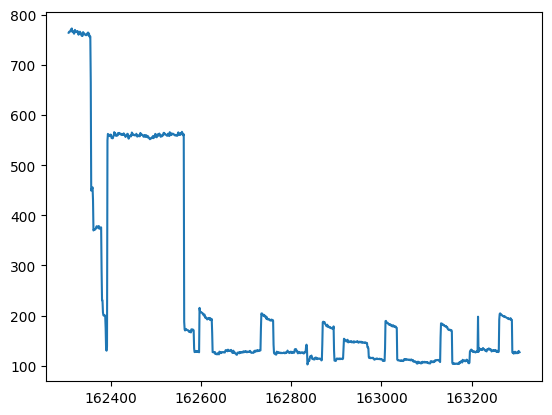

In [1433]:
#data.tail(600)['Wh'].plot()
data['Wh'].plot()

In [1434]:
data['Wh']

162307    763.682647
162308    765.631646
162309    765.957447
162310    765.957447
162311    766.283525
             ...    
163302    126.787349
163303    126.306926
163304    129.739080
163305    126.524444
163306    127.002046
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

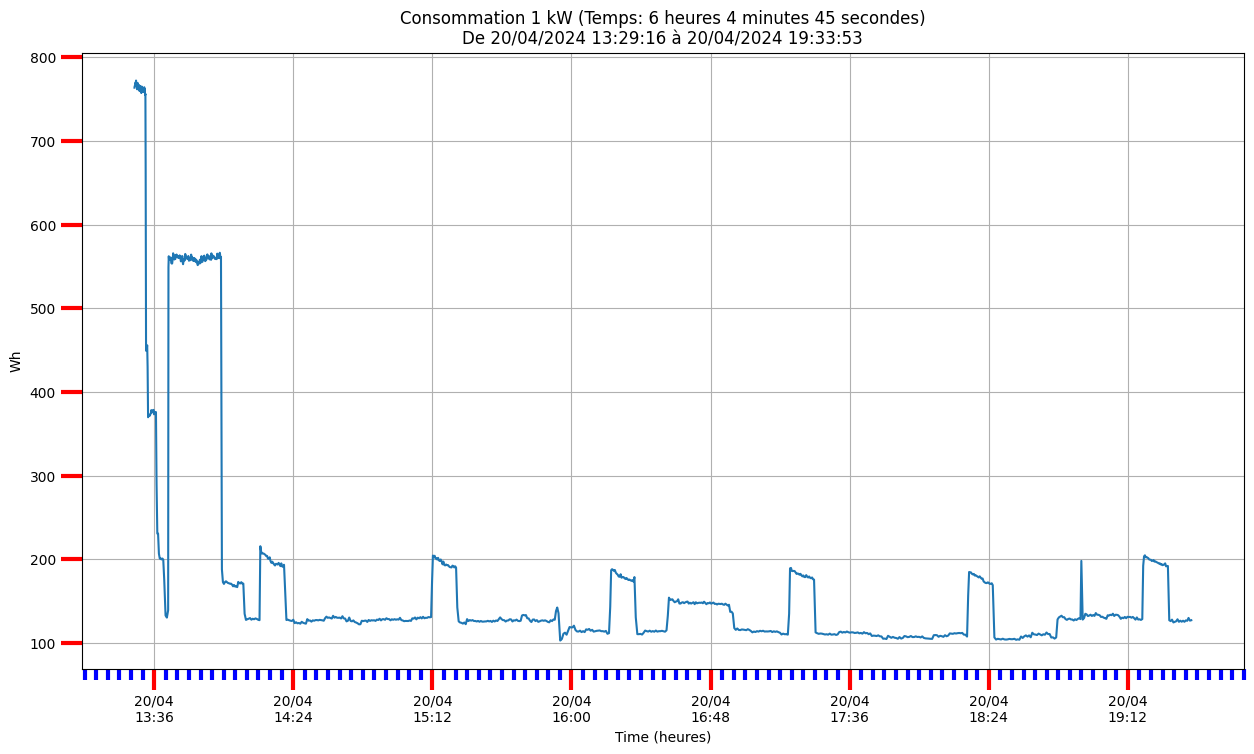

In [1435]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

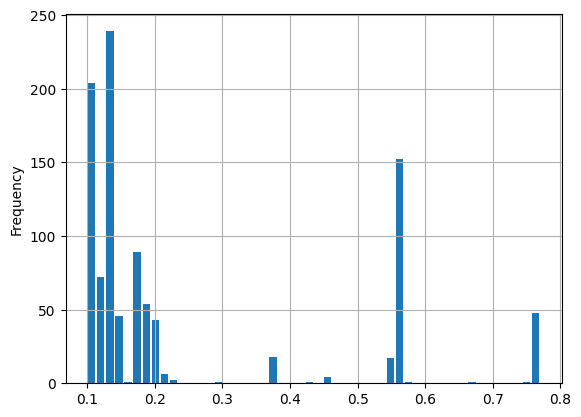

In [1436]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [1437]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
163302,28394,0.13,28.394,126.787349,3865506580,2024-04-20 19:32:00.055381,20/04/2024
163303,28502,0.13,28.502,126.306926,3865535082,2024-04-20 19:32:28.557381,20/04/2024
163304,27748,0.13,27.748,129.739080,3865562830,2024-04-20 19:32:56.305381,20/04/2024
163305,28453,0.13,28.453,126.524444,3865591283,2024-04-20 19:33:24.758381,20/04/2024
163306,28346,0.13,28.346,127.002046,3865619629,2024-04-20 19:33:53.104381,20/04/2024


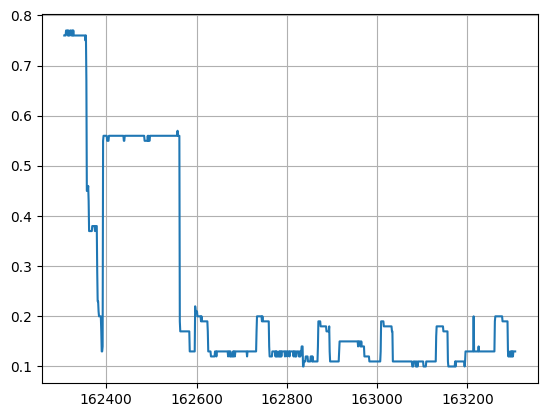

In [1438]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [1439]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(3865619629000.0, 64426.99381666667)

In [1440]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 4, 20, 19, 34, 11, 5976),
 datetime.datetime(2024, 3, 7, 1, 47, 11, 376976))

In [1441]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(163307, 3865620, 1073.7833333333333)

In [1442]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [1443]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [1444]:
732/12 # 60 jours

61.0

In [1445]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

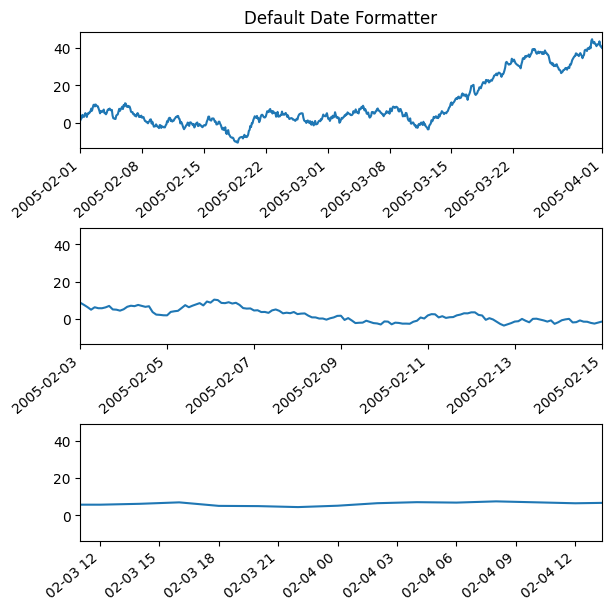

In [1446]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [1447]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)